In [134]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [135]:
# Load the California Housing dataset
# This dataset contains information about housing prices in California
# The goal is to predict the median house value based on various features
data = fetch_california_housing()
X, y = data.data, data.target

In [136]:
# Preprocess the data
# Standardize the features to have zero mean and unit variance
# This helps improve the convergence of gradient descent
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [137]:
# Split the data into train and test sets
# We use 80% of the data for training and 20% for testing
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Define the hyperparameter grid for grid search
# We specify different values for max_iter, learning_rate, and eta0
# max_iter: maximum number of iterations for gradient descent
# learning_rate: learning rate schedule (constant, invscaling, or adaptive)
# eta0: initial learning rate
param_grid = {
    'max_iter': [2500, 5000, 10000],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0': [0.1, 0.5, 0.75]
}

In [139]:
# Perform grid search with 5-fold cross-validation
# We use SGDRegressor as the estimator for gradient descent
# The best hyperparameters are selected based on the cross-validation scores
grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'eta0': [0.1, 0.5, 0.75],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [2500, 5000, 10000]})

In [140]:
# Get the best estimator found by grid search
best_sgd_reg = grid_search.best_estimator_

In [141]:
# Train the SGDRegressor with the best hyperparameters on the full training set
best_sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.5, learning_rate='adaptive', max_iter=2500, random_state=42)

In [142]:
# loss_history = []
# for _ in range(1000):
#     y_pred = best_sgd_reg.predict(X_train)
#     mse_loss = np.mean((y_pred - y_train)**2)
#     loss_history.append(mse_loss)
#     best_sgd_reg.partial_fit(X_train, y_train)

In [143]:
# plt.plot(range(1, len(loss_history) + 1), loss_history, color="blue")
# plt.ylabel("Loss (MSE)")
# plt.xlabel("Iterations")

In [144]:
# Train a linear regression model for comparison
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [145]:
# Make predictions on the test set using the best SGDRegressor model
y_pred_sgd = best_sgd_reg.predict(X_test)

# Make predictions on the test set using the linear regression model
y_pred_lin = lin_reg.predict(X_test)

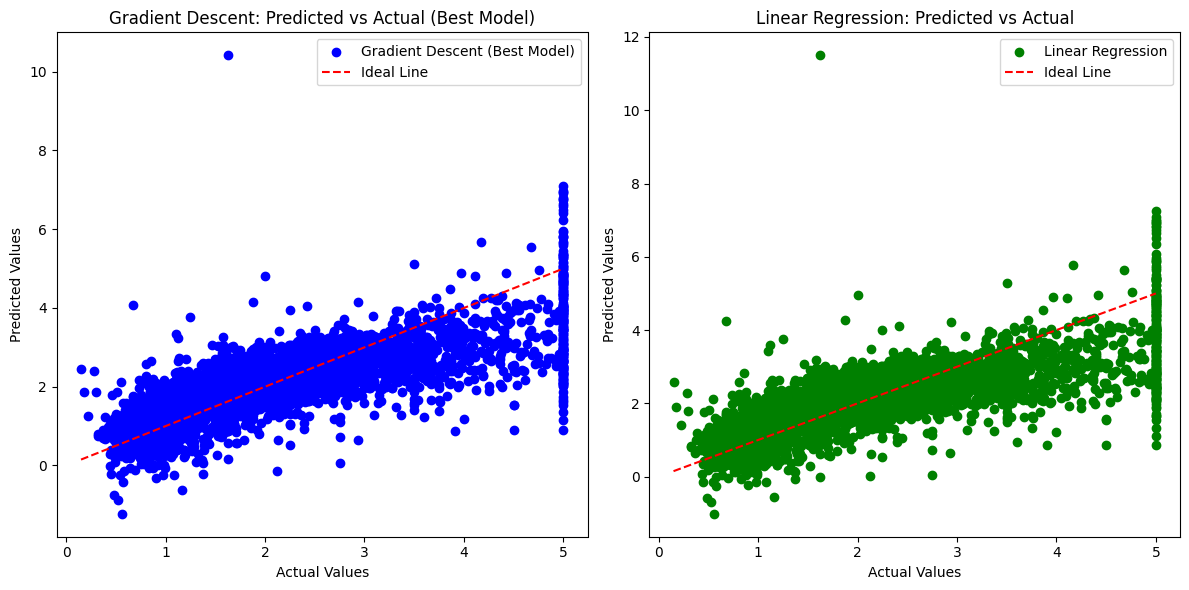

In [146]:
# Plot the predicted vs actual values for both models
plt.figure(figsize=(12, 6))

# Plot for the best SGDRegressor model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_sgd, color='blue', label='Gradient Descent (Best Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Descent: Predicted vs Actual (Best Model)')
plt.legend()

# Plot for the linear regression model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lin, color='green', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()

plt.tight_layout()
plt.show()